# Análise Exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Copetina.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos
Uma pesquisa abrangente sobre tendências demográficas e de saúde em 2019 no estado de Rondônia, no Brasil. Comecemos por analisar os dados do sistema de informação sobre nascidos vivos (SINASC), o objetivo é realizar uma análise aprofundada do tema, este projeto visa encontrar ideias e responder a uma série de questões cruciais.

**Data Science** Portfólio | *27 Abril 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

Assim que a análise exploratória for concluída, prosseguiremos para identificar insights significativos e tendências emergentes nos dados. Usaremos abordagens estatísticas e analíticas para identificar correlações, padrões e associações entre variáveis. Através do uso de técnicas analíticas, tentaremos extrair informações relevantes e úteis para melhor compreender os fatores que influenciam a saúde neonatal em Rondônia. Além disso, exploraremos o impacto das variáveis ​​socioeconómicas e demográficas na saúde materna e nas condições de nascimento.

#### - *Contexto os dados*
Bem-vindos à análise exaustiva dos dados relativos aos recém-nascidos nascidos no estado de Rondônia, Brasil, no ano de 2019. Este projeto nos permite explorar e compreender as tendências demográficas e de saúde desta região através da análise detalhada dos dados fornecidos pelo Sistema de Informações sobre Nascimento (SINASC).

Com um enfoque incisivo nos recém-nascidos, este conjunto de dados contém uma riqueza de informações cruciais, desde a saúde materna e as condições de nascimento até à distribuição demográfica e factores socioeconómicos. Os dados recolhidos oferecem uma visão única da saúde da população recém-nascida, permitindo aos analistas identificar tendências significativas, identificar pontos críticos e propor soluções inovadoras para melhorar o bem-estar dos recém-nascidos e das suas famílias.

O conjunto de dados pode ser encontrado no site do governo brasileiro e segue políticas de privacidade, o que significa que não há nomes de pessoas ou qualquer coisa que nos permita saber quem são os indivíduos.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/fonte.png" alt="capa" width="310">


> Os dados foram fornecidos pelo [DATASUS](https://datasus.saude.gov.br/)

## 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação o ambiente de desenvolvimento</li>
  <li>Entender a estrutura dos dados e colunas (Tratamento)</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>Conclusão e hipótese</li>
</ol>

##### Abaixo você encontrará algumas insights e códigos sobre esses dados. Mas se quiser acessar um material somente com os insights, baixe o [PDF](https://drive.google.com/file/d/1fK1ocDTSzMpDhKy8jJ1yU3LN1Tm-gxcV/view?usp=drivesdk)

---

## Preparação o ambiente de desenvolvimento

- Importando os pacotes

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import calendar

from main import GuidaDataframe
pd.set_option('display.max_columns', None)

- Carregando o Dataset

In [71]:
df = pd.read_csv('Data\SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


- Informações sobre as colunas:

tebela

## Entender a estrutura dos dados e colunas (Tratamento)
Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu Tipo, sua quantidade de categorias, quantos dados nulos e a porcentagem deles.

### Remover duplicados

In [72]:
df.drop_duplicates(inplace=True)

### Estrutura das colunas
Agora vamos ver com mais detalhes como é a estrutura das colunas usando a função esplorazione() do pacote `main.py`

In [73]:
columns = [
       # Em uso
       'ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'DTRECORIGA', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 
       'CONSPRENAT', 'MESPRENAT', 'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       
       # 
       'SEMAGESTAC', 'CODANOMAL', 'DIFDATA', 'DTRECEBIM', 'VERSAOSIST', 'NUMEROLOTE', 'CODMUNRES',
       'CODOCUPMAE', 'CODMUNNASC', 'CODESTAB', 'TPMETESTIM', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR']

In [74]:
df = df[['ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
    'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 
    'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 
    'DTCADASTRO', 'DTRECORIGA', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 
    'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT', 
    'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea']]

In [75]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
Tabela_Exploratoria

Tabela Exploratória
Nesses dados temos 27.028 linhas e 38 colunas.
Consumo de memória: 27.68Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,ORIGEM,numpy.int64,1,0,0.0,0.0
2,LOCNASC,numpy.int64,4,0,0.0,0.0
3,IDADEMAE,numpy.int64,40,0,0.0,0.0
4,ESTCIVMAE,numpy.float64,6,317,1.0,0.0
5,ESCMAE,str,5,312,1.0,2.0
6,QTDFILVIVO,numpy.float64,15,1573,6.0,0.0
7,QTDFILMORT,numpy.float64,11,2098,8.0,0.0
8,GESTACAO,str,6,1232,5.0,2.0
9,GRAVIDEZ,str,3,79,0.0,2.0
10,PARTO,str,2,49,0.0,2.0


In [76]:
Tabela_Exploratoria['Tipo'].value_counts()

Tipo
numpy.float64    21
str              12
numpy.int64       5
Name: count, dtype: int64

<Axes: >

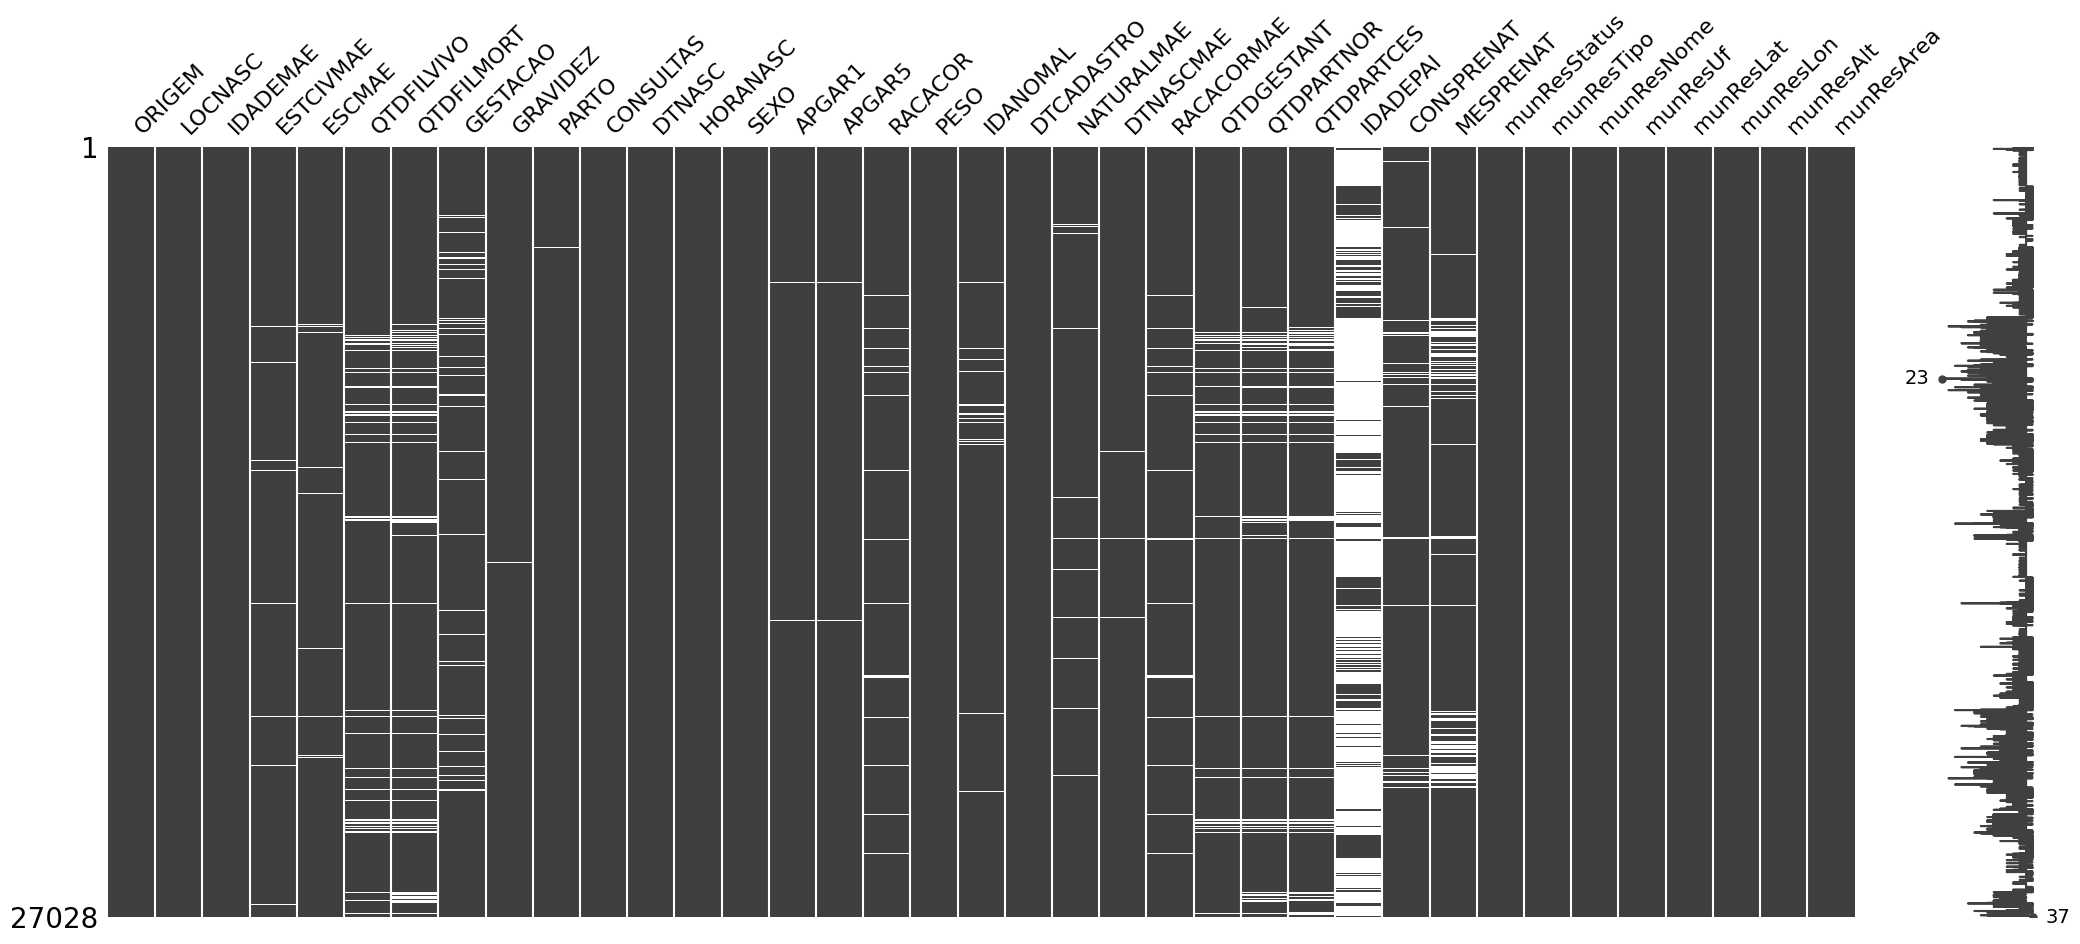

In [79]:
msno.matrix(df)

In [77]:
Tabela_Exploratoria[Tabela_Exploratoria['Dados nulos %'] > 0]

,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
4,ESTCIVMAE,numpy.float64,6,317,1.0,0.0
5,ESCMAE,str,5,312,1.0,2.0
6,QTDFILVIVO,numpy.float64,15,1573,6.0,0.0
7,QTDFILMORT,numpy.float64,11,2098,8.0,0.0
8,GESTACAO,str,6,1232,5.0,2.0
17,RACACOR,str,5,647,2.0,2.0
19,IDANOMAL,numpy.float64,3,591,2.0,0.0
21,DTRECORIGA,numpy.float64,0,27028,100.0,0.0
22,NATURALMAE,numpy.float64,27,298,1.0,0.0
24,RACACORMAE,numpy.float64,5,661,2.0,0.0


In [78]:
df.drop(columns='DTRECORIGA', axis=1, inplace=True)